# <center>Universidade Federal da Paraíba - UFPB</center>

## <center>Centro de Informática - CI</center>

## <center>Curso de Engenharia da Computação</center>

## <center>Introdução a Teoria da Informação - ITI: Parte 1 do Trabalho Prático</center>

#### Alunos: Epitácio Neto, Guilherme Moreira, Kenji Sato

#### Matrículas: 11506856, 20160105205, 11514918

#### Professor: Derzu Omaia

# Introdução

Este relatório tem como proposta a implementação, na linguagem python, de um compressor e descompressor de diferentes tipos de dados utilizando o algoritmo Lempel-Ziv-Welch (LZW). O LZW é um algoritmo de compressão derivado do do algoritmo LZ78, que se baseia na localização e no registro dos padrões de uma determinada estrutura de dados. O algoritmo foi desenvolvido e patenteado em 1984 por Terry Welch. 

# Descrição do Problema

Parte 1:

Implemente um compressor e descompressor utilizando o PPM-C (visto em sala de aula)
com o codificador aritmético, ou utilizando o algoritmo LZW. Considere que as
mensagens são geradas por fontes com alfabeto A = {0, 1, ..., 255}. Teste o
compressor/descompressor com um corpus de texto em português de 16MB e com um
arquivo binário de vídeo.

PPM-C + Aritmético:

O contexto deve ter tamanho máximo K (parâmetro). O modelo PPM-C
alimentará um codificador aritmético. Utilize o mecanismo de exclusão quando
necessário. No relatório apresente as curvas de RC x K e de Tempo de Processamento x
K, para K = 0, 1, 2, 3, 4, 5, 6, 7, 8. Não é necessário implementar o codificador
aritmético, utilize algum já existente.

LZW:

O índice do dicionário deve ser testado com diferentes tamanhos K bits
(parâmetro). Exemplo: K=9bits tamanho do dicionário: 2^9=512, K=10bits tamanho do
dicionário 2^10=1024. No relatório apresente as curvas de RC x K e de Tempo de
Processamento x K, para K = 9, 10, 11, 12, 13, 14, 15, 16 bits. Indique também a
quantidade total de índices presentes na mensagem final para cada K.

Observações:

• Os símbolos do arquivo de teste devem ser lidos no modo binário (números) e não
no modo texto (caracteres/strings).

• O codificador deve receber como entrada um arquivo e gerar como saída o
arquivo codificado.

• A execução dos experimentos é demorada, evite fazer os experimentos na véspera
da entrega pois não dará tempo.

# Ferramentas Utilizadas

A implementação total do algoritmo, tanto o compressor como o descompressor, foi feita em python utilizando o Visual Studio Code como ambiente de desenvolvimento. No VSCode realizamos todos os testes que serão apresentados nas proximas sessões deste relatorio. Para os testes utilizamos dois arquivos de entrada diferentes disponibilizados pelo Professor Derzu, um arquivo .txt de 16MB e um video .mp4 de aproximadamente 2MB.

# Desenvolvimento

### Bibliotecas

In [ ]:
import sys
from sys import argv
import struct
from struct import *
import time
import os
from typing import Sized
import numpy as np

### Funções

### Encoder

In [ ]:
def encoder(data, max_tam):
    #iniciando dicionario
    inicio = time.time()
    dicionario_tam = 256                   
    dicionario = {chr(i): i for i in range(dicionario_tam)}    
    string = ""             
    dados_comprimido = []   #armazena os dados comprimidos.

    #comeca LZW | Interando por cada indice no arquivo de entrada
    for indices in data:                     
        concat_indices = string + indices #concatena os indices
        if concat_indices in dicionario:  #verifica se tem o indice atual no dicionario
            string = concat_indices       #armazena o indice atual em string
        else:
            dados_comprimido.append(dicionario[string]) #adiciona a saida o indice atual 
            if(len(dicionario) <= max_tam):  #verifica se o dicionario esta cheio
                dicionario[concat_indices] = dicionario_tam #adiciona ao dicionario o novo simbolo caso o dicionario nao esteja cheio
                dicionario_tam += 1 
            string = indices

    if string in dicionario:
        dados_comprimido.append(dicionario[string])

    #armazenando a string comprimida no arquivo de saida byte a byte
    out = input_file.split(".")[0]
    output_file = open(out + "_" + str(max_tam) + "_saida.lzw", "wb")
    for data in dados_comprimido:
        output_file.write(pack('>H',int(data)))
 
    print("RC para " + str(k) +  " Bits ", len(str(data)) / len(str(output_file)))
    fim = time.time()
    print("Tempo de processamento para " + str(k) +  " Bits", fim - inicio)
    output_file.close()
    file.close()
    return output_file



### Decoder

In [2]:
def decoder(file, k):

    compressed_data = []
    next_code = 256
    decompressed_data = ""
    string = ""

    while True:
        rec = file.read(2)
        if len(rec) != 2:
            break
        (data, ) = unpack('>H', rec)
        compressed_data.append(data)

    dictionary_size = 256
    dictionary = dict([(x, chr(x)) for x in range(dictionary_size)])

    for code in compressed_data:
        if not (code in dictionary):
            dictionary[code] = string + (string[0])
        decompressed_data += dictionary[code]
        if not(len(string) == 0):
            dictionary[next_code] = string + (dictionary[code][0])
            next_code += 1
        string = dictionary[code]

    out = input_file.split(".")[0]
    output_file = open(out + "_decoded.txt", "w")
    for data in decompressed_data:
        output_file.write(data)
        
    output_file.close()
    file.close()

# Resultados
## Exemplo 1: Texto

### Encoder

In [ ]:
input_file = argv[1]
file = open(input_file, "rb") 
data = str(file.read())  
tamanho_or = file.tell()

print("Quantidade de indices no arquivo de entrada: " + str(len(data)))
print("Tamanho do arquivo de entrada:  " + str(tamanho_or) + " KB")
for k in range(9,16):
    max_tam = pow(2,int(k))                 
    encoder(data, max_tam)

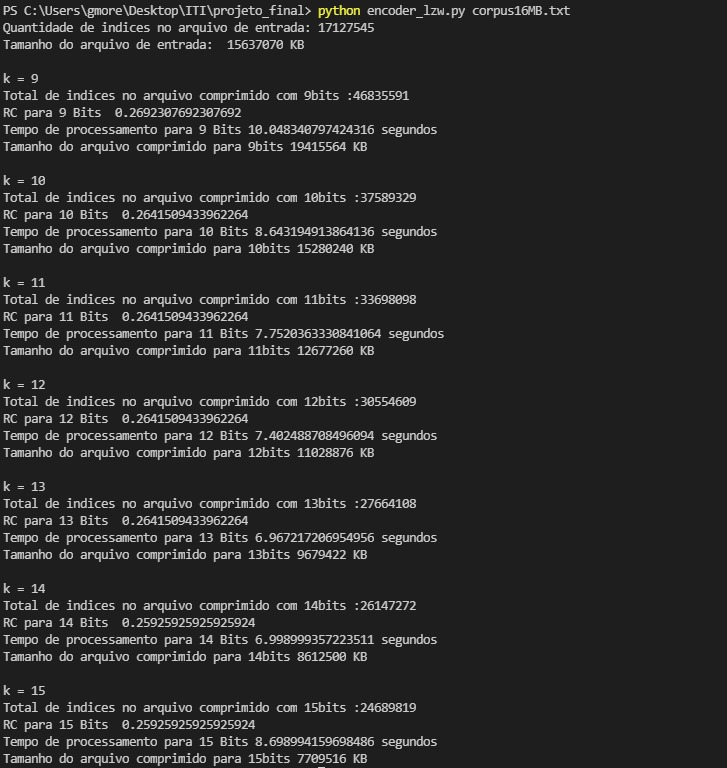

Abaixo podemos ver o resultado do tamanho final de cada arquivo com o seu tamanho do dicionario definido anteriormente:

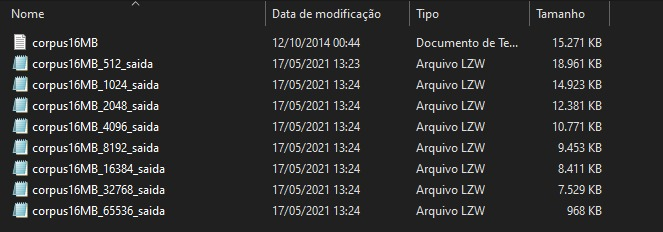

### Decoder

In [ ]:
input_file, k = argv[1:]            
maximum_table_size = pow(2,int(k))
file = open(input_file, "rb")
decoder(file, maximum_table_size)

Para este, podemos comparar o arquivo codificado com o decodificado, mostrando o que a operação, via código, fez:

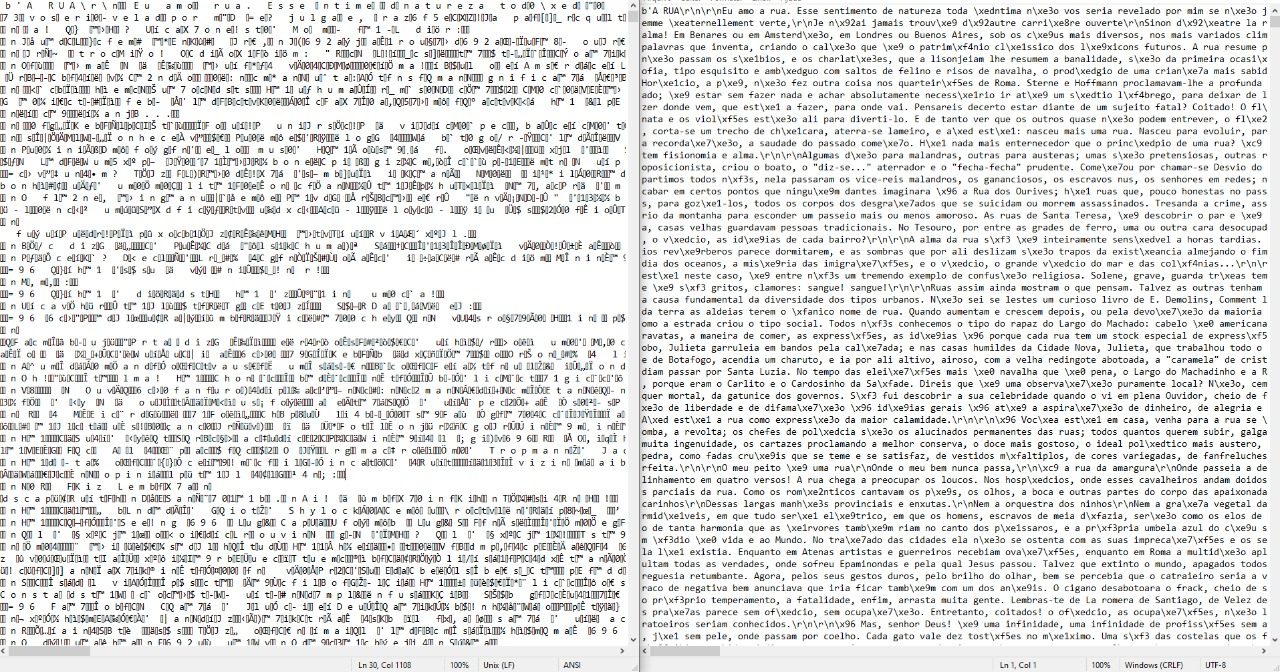

Podemos ver também que apos a descompressão o arquivo volta ao seu tamanho original:

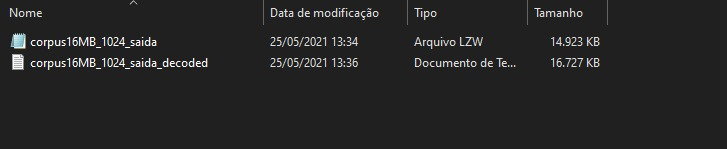

## Exemplo 2: Video

### Encoder

In [ ]:
input_file = argv[1]
file = open(input_file, "rb") 
data = str(file.read())  
tamanho_or = file.tell()

print("Quantidade de indices no arquivo de entrada: " + str(len(data)))
print("Tamanho do arquivo de entrada:  " + str(tamanho_or) + " KB")
for k in range(9,16):
    max_tam = pow(2,int(k))                 
    encoder(data, max_tam)

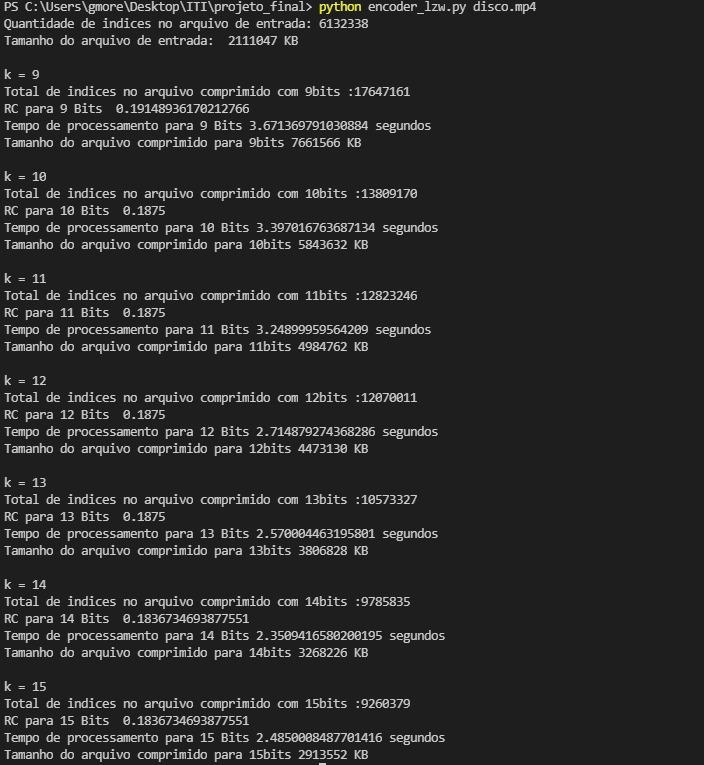

Para o video podemos comparar também o resultado final de cada k bits ao tamanho original na sua compressão:

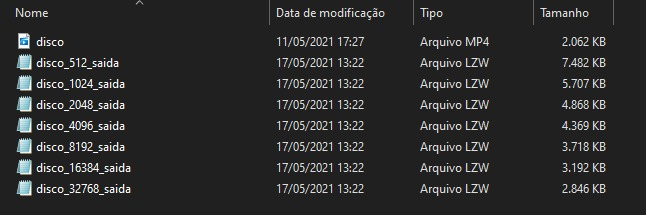

### Decoder

In [ ]:
input_file, k = argv[1:]            
maximum_table_size = pow(2,int(k))
file = open(input_file, "rb")
decoder(file, maximum_table_size)

Podemos comparar a saida da função de descompressão com o arquivo comprimido visualizando seus arquivos:

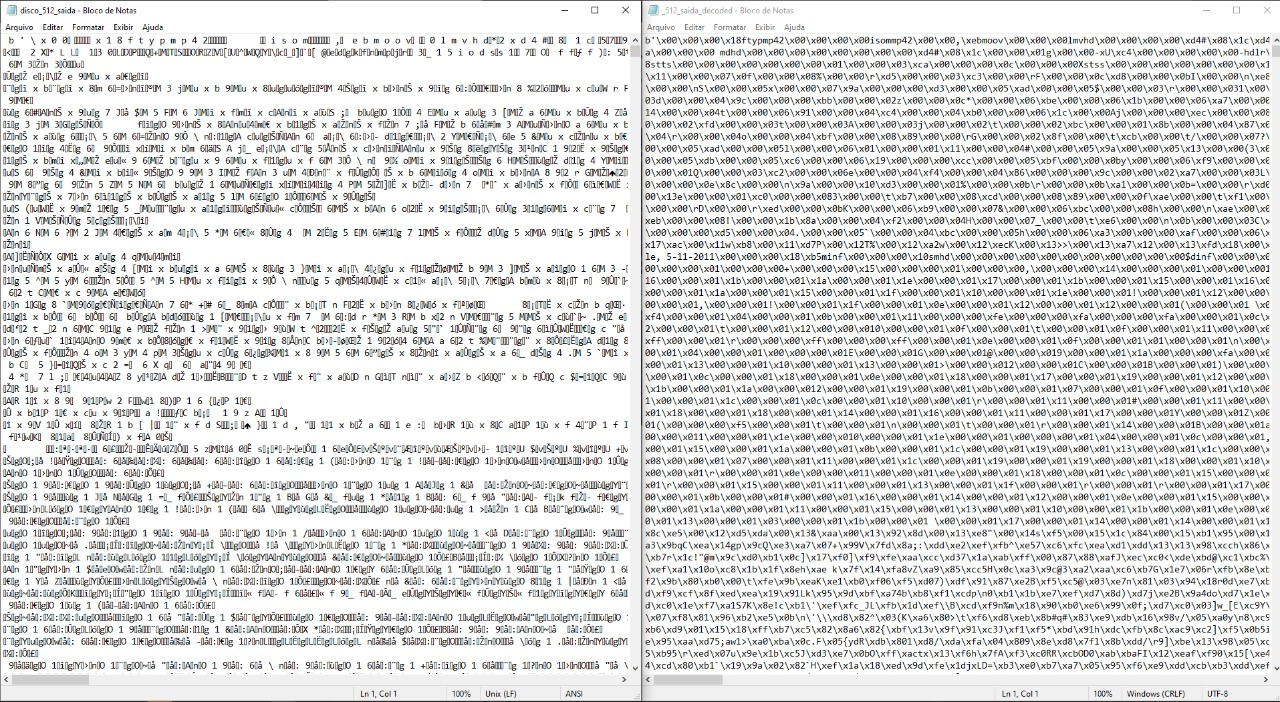

# Conclusão

Com os resultados apresentados acima é visto que para o arquivo .txt de 16MB conseguimos ter uma boa razão de compressão, principalmente quando o tamanho do dicionario é definido para 16 K bits quando temos um arquivo de saída de apenas 968 KB comparado aos 16 MB do seu arquivo original. Para o arquivo .mp4 não obtivemos resultados excelentes em sua compressão. Podemos ver que o melhor resultado, levando em conta apenas o tamanho final do arquivo de saída, foi de aproximadamente 2846 KB com um dicionario de 16 k bits, apresentando um valor ainda maior em relação ao seu arquivo de entrada que é de apenas 2062 KB.

# Referências Bibliográficas

ITECHNICA. 6. Dynamic Dictionary - LZW Encoding. Youtube, 9 de Dez. de 2017. Disponível em: <https://www.youtube.com/watch?v=14wpPMN-0Fw&ab_channel=itechnica>. Acesso em: 15 de Mai. de 2021.

ITECHNICA. 7. Dynamic Dictionary - LZW Decoding. Youtube, 9 de Dez. de 2017. Disponível em: <https://www.youtube.com/watch?v=pRxiCYwclqg&ab_channel=itechnica>. Acesso em: 15 de Mai. de 2021.

UNIVERSIDADE ESTADUAL DE CAMPINAS - Unicamp. Algoritmo LZW (Lempel-Ziv-Welch). Disponível em: <https://www.decom.fee.unicamp.br/dspcom/EE088/Algoritmo_LZW.pdf>. Acesso em: 16 de Mai. de 2021.

SAIKIA, Amartya Ranjan. LZW (Lempel–Ziv–Welch) Compression technique, 9 de Set. de 2019. Disponível em: <https://www.geeksforgeeks.org/lzw-lempel-ziv-welch-compression-technique/>. Acesso em: 16 de Mai. de 2021.

LEMPEL–ZIV–WELCH. In: Wikipédia: a enciclopédia livre. Disponível em:. <https://en.wikipedia.org/wiki/Lempel%E2%80%93Ziv%E2%80%93Welch>. Acesso em: 16 de Mai. de 2021.

OMAIA, Derzu. Codificadores baseados em Dicionário, 13-15 de Set. de 2021. Notas de Aula.